# Generation of the simulation 

### News :
- initial point eq or other

In [1]:
import time as tm
import colorsys
import pickle # package use to save data

exec(open("solver2.py").read(), globals())
exec(open("param.py").read(), globals())

In [2]:
def exemples(name, Number_of_simulation = 100, mean = True, **kwargs):
    name = name+"_freq="+str(kwargs["Fire_param"]["param_freq"]["p"])+".png"
    O = Ode(**kwargs)
    Y = O.solve_by_part()
    O.plot_time_series(save = True, name = name, generation = True, show = False)
    return Y

In [3]:
def param_study(Number_of_simulation, numbreDePoint, Freq, Param_phy, Init, finalTime, alpha, beta, strength, name):
   # Color = ["blue", "g", "red", "orange", "pink", "black", "magenta", "grey"]
    Param_coupled = {"alpha":alpha,
                     "beta":beta}
    Param_freq = {"p":-1} # going to change
    Param_strength = {"scale":strength}
    Fire_param = {"model": "coupled",
                    "frequence": "bernoulli",
                    "param_freq" : Param_freq,
                    "amplitude": "exponential",
                    "Param_strength" : Param_strength,
                    "Param_coupled" : Param_coupled,
                    "type" : "proportionnal",
                    "coef_W_N" : 5}


    # Initialization of arrays
    Collapse_proba = np.zeros((numbreDePoint, len(Freq)))
    Collapse_proba_per_time_unit = np.zeros_like(Collapse_proba)

    Variability_always_N = np.zeros_like(Collapse_proba)
    Variability_until_N = np.zeros_like(Collapse_proba)
    Variability_10_N = np.zeros_like(Collapse_proba)
    Variability_only_N = np.zeros_like(Collapse_proba)
    Variability_tr10_N = np.zeros_like(Collapse_proba)
    Variability_tr0_N = np.zeros_like(Collapse_proba)
    
    Variability_always_W = np.zeros_like(Collapse_proba)
    Variability_until_W = np.zeros_like(Collapse_proba)
    Variability_10_W = np.zeros_like(Collapse_proba)
    Variability_only_W = np.zeros_like(Collapse_proba)
    Variability_tr10_W = np.zeros_like(Collapse_proba)
    Variability_tr0_W = np.zeros_like(Collapse_proba)
    
    Variability_always_NW = np.zeros_like(Collapse_proba)
    Variability_until_NW = np.zeros_like(Collapse_proba)
    Variability_10_NW = np.zeros_like(Collapse_proba)
    Variability_only_NW = np.zeros_like(Collapse_proba)
    Variability_tr10_NW = np.zeros_like(Collapse_proba)
    Variability_tr0_NW = np.zeros_like(Collapse_proba)
    
    #Exemples = np.zeros(len(Freq))
    
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire_param["param_freq"] = Param_freq
        dt = min(0.1, 0.1/freq)
        #Init = [1, Param_phy[1]]
        exemples(name = name, Number_of_simulation = Number_of_simulation, mean = False, finalTime = finalTime, Fire_param = Fire_param, dt = dt, Param_phy=Param_phy, Init=Init)
        for j in range(numbreDePoint):
            S = Solver(numberOfSimulation=Number_of_simulation, model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
            S.run()
            Collapse_proba[j,i] = S.collapse_proba()
            Collapse_proba_per_time_unit[j,i] = S.collapse_proba_per_time_unit()

            Variability_always_N[j,i] = S.variability_always(applicant="N")
            Variability_until_N[j,i] = S.variability_until(applicant="N")
            Variability_10_N[j,i] = S.variability_10(applicant="N")
            Variability_only_N[j,i] = S.variability_only(applicant="N")
            Variability_tr10_N[j,i] = S.variability_tr10(applicant="N")
            Variability_tr0_N[j,i] = S.variability_tr0(applicant="N")
            
            Variability_always_W[j,i] = S.variability_always(applicant="W")
            Variability_until_W[j,i] = S.variability_until(applicant="W")
            Variability_10_W[j,i] = S.variability_10(applicant="W")
            Variability_only_W[j,i] = S.variability_only(applicant="W")
            Variability_tr10_W[j,i] = S.variability_tr10(applicant="W")
            Variability_tr0_W[j,i] = S.variability_tr0(applicant="W")
            
            Variability_always_NW[j,i] = S.variability_always(applicant="N+W")
            Variability_until_NW[j,i] = S.variability_until(applicant="N+W")
            Variability_10_NW[j,i] = S.variability_10(applicant="N+W")
            Variability_only_NW[j,i] = S.variability_only(applicant="N+W")
            Variability_tr10_NW[j,i] = S.variability_tr10(applicant="N+W")
            Variability_tr0_NW[j,i] = S.variability_tr0(applicant="N+W")
            
           # print("\nTime solve init", t05-t0)
            #print("Time solver ", t1-t05)
            #print("Time collapse ", t2-t1)
            #print("Time variability ", t3-t2)
       
    Measures = {"Collapse_proba": Collapse_proba,
                "Collapse_proba_per_time_unit": Collapse_proba_per_time_unit, 
                
                "Variability_always_N": Variability_always_N, 
                "Variability_until_N":Variability_until_N,
                "Variability_10_N":Variability_10_N,
                "Variability_only_N":Variability_only_N,
                "Variability_tr10_N": Variability_tr10_N,
                "Variability_tr0_N": Variability_tr0_N,
                
                "Variability_always_W": Variability_always_W, 
                "Variability_until_W":Variability_until_W,
                "Variability_10_W":Variability_10_W,
                "Variability_only_W":Variability_only_W,
                "Variability_tr10_W": Variability_tr10_W,
                "Variability_tr0_W": Variability_tr0_W,
                
                "Variability_always_NW": Variability_always_NW, 
                "Variability_until_NW":Variability_until_NW,
                "Variability_10_NW":Variability_10_NW,
                "Variability_only_NW":Variability_only_NW,
                "Variability_tr10_NW": Variability_tr10_NW,
                "Variability_tr0_NW": Variability_tr0_NW              
               }
    
    # save data
    pickle_out = open(name+".txt","wb")
    pickle.dump(Measures, pickle_out)
    pickle_out.close()
    
    return

Time at the lunch of the simulation : 
 Tue Apr 30 16:01:10 2019 , Figure  0 (total  2880 )
Tue Apr 30 16:04:32 2019 , Figure  12 (total  2880 )
Tue Apr 30 16:07:52 2019 , Figure  24 (total  2880 )
Tue Apr 30 16:11:13 2019 , Figure  36 (total  2880 )
Tue Apr 30 16:14:32 2019 , Figure  48 (total  2880 )
Tue Apr 30 16:17:52 2019 , Figure  60 (total  2880 )
Tue Apr 30 16:21:12 2019 , Figure  72 (total  2880 )
Tue Apr 30 16:24:31 2019 , Figure  84 (total  2880 )
Tue Apr 30 16:27:52 2019 , Figure  96 (total  2880 )
Tue Apr 30 16:31:15 2019 , Figure  108 (total  2880 )
Tue Apr 30 16:34:38 2019 , Figure  120 (total  2880 )
Tue Apr 30 16:38:00 2019 , Figure  132 (total  2880 )
Tue Apr 30 16:41:23 2019 , Figure  144 (total  2880 )
Tue Apr 30 16:44:43 2019 , Figure  156 (total  2880 )
Tue Apr 30 16:48:04 2019 , Figure  168 (total  2880 )
Tue Apr 30 16:51:26 2019 , Figure  180 (total  2880 )
Tue Apr 30 16:54:48 2019 , Figure  192 (total  2880 )
Tue Apr 30 16:58:10 2019 , Figure  204 (total  2880 

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:136: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:184: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:207: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:185: RuntimeWarning: Mean of empty slice


Tue Apr 30 19:45:51 2019 , Figure  804 (total  2880 )
Tue Apr 30 19:49:13 2019 , Figure  816 (total  2880 )
Tue Apr 30 19:52:33 2019 , Figure  828 (total  2880 )
Tue Apr 30 19:55:54 2019 , Figure  840 (total  2880 )
Tue Apr 30 19:59:15 2019 , Figure  852 (total  2880 )
Tue Apr 30 20:02:36 2019 , Figure  864 (total  2880 )
Tue Apr 30 20:05:57 2019 , Figure  876 (total  2880 )
Tue Apr 30 20:09:17 2019 , Figure  888 (total  2880 )
Tue Apr 30 20:12:38 2019 , Figure  900 (total  2880 )
Tue Apr 30 20:15:58 2019 , Figure  912 (total  2880 )
Tue Apr 30 20:19:19 2019 , Figure  924 (total  2880 )
Tue Apr 30 20:22:41 2019 , Figure  936 (total  2880 )
Tue Apr 30 20:26:01 2019 , Figure  948 (total  2880 )
Tue Apr 30 20:29:22 2019 , Figure  960 (total  2880 )
Tue Apr 30 20:32:43 2019 , Figure  972 (total  2880 )
Tue Apr 30 20:36:04 2019 , Figure  984 (total  2880 )
Tue Apr 30 20:39:26 2019 , Figure  996 (total  2880 )
Tue Apr 30 20:42:47 2019 , Figure  1008 (total  2880 )
Tue Apr 30 20:46:07 2019 , 

Wed May  1 04:09:06 2019 , Figure  2604 (total  2880 )
Wed May  1 04:12:28 2019 , Figure  2616 (total  2880 )
Wed May  1 04:15:50 2019 , Figure  2628 (total  2880 )
Wed May  1 04:19:12 2019 , Figure  2640 (total  2880 )
Wed May  1 04:22:33 2019 , Figure  2652 (total  2880 )
Wed May  1 04:25:55 2019 , Figure  2664 (total  2880 )
Wed May  1 04:29:17 2019 , Figure  2676 (total  2880 )
Wed May  1 04:32:39 2019 , Figure  2688 (total  2880 )
Wed May  1 04:35:58 2019 , Figure  2700 (total  2880 )
Wed May  1 04:39:18 2019 , Figure  2712 (total  2880 )
Wed May  1 04:42:39 2019 , Figure  2724 (total  2880 )
Wed May  1 04:45:59 2019 , Figure  2736 (total  2880 )
Wed May  1 04:49:19 2019 , Figure  2748 (total  2880 )
Wed May  1 04:52:39 2019 , Figure  2760 (total  2880 )
Wed May  1 04:55:59 2019 , Figure  2772 (total  2880 )
Wed May  1 04:59:20 2019 , Figure  2784 (total  2880 )
Wed May  1 05:02:41 2019 , Figure  2796 (total  2880 )
Wed May  1 05:06:02 2019 , Figure  2808 (total  2880 )
Wed May  1

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:484: RuntimeWarning: invalid value encountered in less
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Wed May  1 05:19:20 2019 , Figure  2856 (total  2880 )
Wed May  1 05:22:41 2019 , Figure  2868 (total  2880 )
Wed May  1 05:26:02 2019 , Figure  2880 (total  2880 )


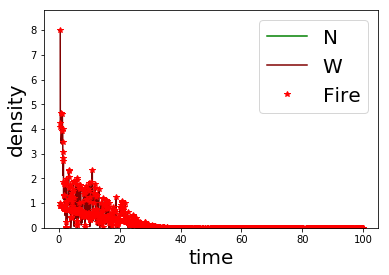

In [4]:
nomberFigure = len(N0)*len(W0)*len(FinalTime)*len(A)*len(M)*len(Alpha)*len(Beta)*len(Strength)
fig_by_loop = len(Freq) + 1

c=0
print("Time at the lunch of the simulation : \n", tm.ctime(), ", Figure ", c*fig_by_loop, "(total ", fig_by_loop*nomberFigure, ")") # afficher l'heure


for n0 in N0:
    for w0 in W0:
        Init = [n0, w0]
        for finalTime in FinalTime:
            for a in A:
                for m in M:
                    Param_phy = [a, m]
                    if(n0=="equilibrium"):
                        Init[0] = 1.
                    if(w0=="equilibrium"):
                        Init[1] = Param_phy[1]
                    for strength in Strength:
                        for alpha in Alpha:
                            for beta in Beta:
                                name = DOSSIER+"n0="+str(Init[0])+"_w0="+str(Init[1])+"_final_time="+str(finalTime)+"_a="+str(a)+"_m="+str(m)+"_strength="+str(strength)+"_alpha="+str(alpha)+"_beta="+str(beta)
                                param_study(Number_of_simulation, numbreDePoint, Freq, Param_phy, Init, finalTime, alpha, beta, strength, name)           
                                c+=1
                                print(tm.ctime(), ", Figure ", c*fig_by_loop, "(total ", fig_by_loop*nomberFigure, ")") # afficher l'heure

### End at 12h10